# Energy Consumption under Mesh, MCU and SFU RTP topologies

In [ ]:
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates 
xformatter = mdates.DateFormatter('%H:%M') # for time axis plots

# import plotly.offline as py
# py.init_notebook_mode(connected=True)

import sklearn
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_sfu = pd.read_csv("/content/energy_SFU.csv")
df_mcu = pd.read_csv("/content/energy (6).csv")
df_direct = pd.read_csv("/content/energy_directmedia.csv")
df_followtalker = pd.read_csv("/content/energy_FollowTalker.csv")

In [ ]:
df_sfu.head()

,Seconds since last update,CPU Utilization,CPU Speed
0,1.903,0.75,0.75
1,2.082,0.75,0.75
2,1.945,0.75,0.75
3,3.022,0.75,0.75
4,1.261,0.75,0.75


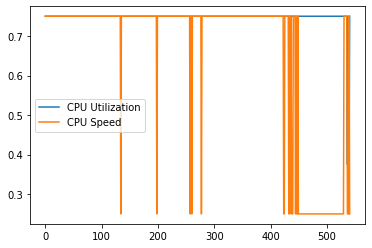

In [ ]:
df_sfu.plot()

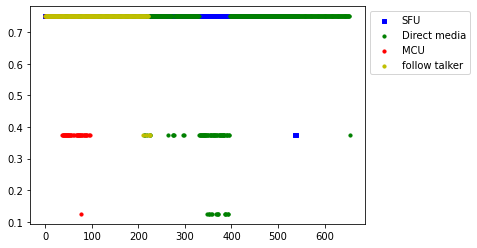

In [ ]:
# x = range(100)
# y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df_sfu.index, df_sfu["CPU Utilization"], s=10, c='b', marker="s", label='SFU')
ax1.scatter(df_direct.index, df_direct["CPU Utilization"], s=10, c='g', marker="o", label='Direct media')
ax1.scatter(df_mcu.index, df_mcu["CPU Utilization"], s=10, c='r', marker="o", label='MCU')
ax1.scatter(df_followtalker.index, df_followtalker["CPU Utilization"], s=10, c='y', marker="o", label='follow talker')

plt.legend(bbox_to_anchor=(1, 1));
plt.show()

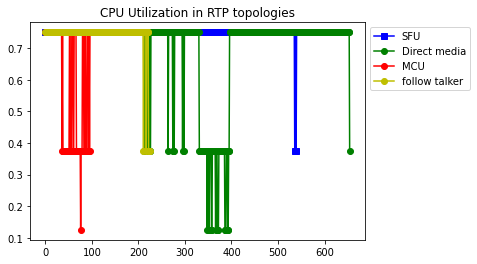

In [ ]:
# x = range(100)
# y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title("CPU Utilization in RTP topologies")
ax1.plot(df_sfu.index, df_sfu["CPU Utilization"], c='b', marker="s", label='SFU')
ax1.plot(df_direct.index, df_direct["CPU Utilization"], c='g', marker="o", label='Direct media')
ax1.plot(df_mcu.index, df_mcu["CPU Utilization"], c='r', marker="o", label='MCU')
ax1.plot(df_followtalker.index, df_followtalker["CPU Utilization"], c='y', marker="o", label='follow talker')

plt.legend(bbox_to_anchor=(1, 1));
plt.show()

In [ ]:
df_rtp= pd.merge(df_sfu, df_direct,df_mcu,df_followtalker, how="outer", on=)
df_rtp.tail()

TypeError: ignored

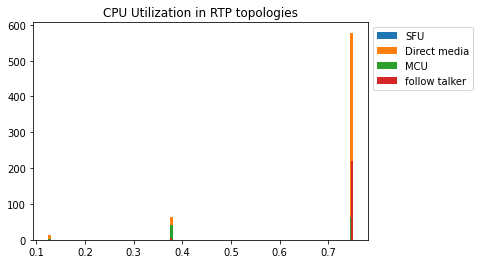

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title("CPU Utilization in RTP topologies")
plt.hist( df_sfu["CPU Utilization"],bins=100,  label='SFU')
plt.hist( df_direct["CPU Utilization"],bins=100, label='Direct media')
plt.hist( df_mcu["CPU Utilization"], bins=100, label='MCU')
plt.hist( df_followtalker["CPU Utilization"], bins=100, label='follow talker')

plt.legend(bbox_to_anchor=(1, 1));
plt.show()

## Direct

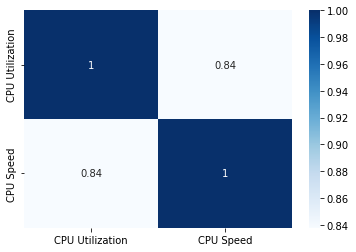

In [ ]:

import seaborn as sb
corr_df = df_direct.corr()
sb.heatmap(corr_df, cmap="Blues", annot=True)

In [ ]:
df_direct.describe()

,CPU Utilization,CPU Speed
count,655.000000,655.000000
mean,0.700573,0.693511
std,0.139505,0.158403
min,0.125000,0.250000
25%,0.750000,0.750000
50%,0.750000,0.750000
75%,0.750000,0.750000
max,0.750000,0.750000


## MCU

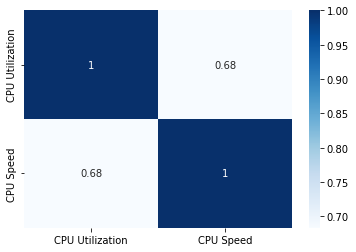

In [ ]:
corr_df = df_mcu.corr()
sb.heatmap(corr_df, cmap="Blues", annot=True)

In [ ]:
df_mcu.describe()

,CPU Utilization,CPU Speed
count,104.000000,104.000000
mean,0.599760,0.533654
std,0.188714,0.248924
min,0.125000,0.250000
25%,0.375000,0.250000
50%,0.750000,0.750000
75%,0.750000,0.750000
max,0.750000,0.750000


## SFU 

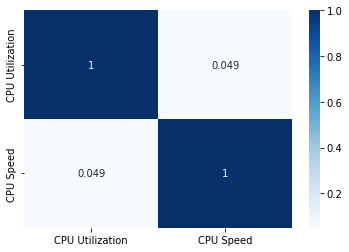

In [ ]:
corr_df = df_sfu.corr()
sb.heatmap(corr_df, cmap="Blues", annot=True)

In [ ]:
df_sfu.describe()

,CPU Utilization,CPU Speed
count,541.000000,541.000000
mean,0.748614,0.657579
std,0.022780,0.194265
min,0.375000,0.250000
25%,0.750000,0.750000
50%,0.750000,0.750000
75%,0.750000,0.750000
max,0.750000,0.750000


In [ ]:
df_rtp0= pd.DataFrame({
    "SFU": df_sfu["CPU Utilization"].describe(),
    "MCU": df_mcu["CPU Utilization"].describe(),
    "Direct": df_direct["CPU Utilization"].describe(),
    "Follow talker": df_followtalker["CPU Utilization"].describe()
})
df_rtp0.head()

,SFU,MCU,Direct,Follow talker
count,541.000000,104.000000,655.000000,225.000000
mean,0.748614,0.599760,0.700573,0.741667
std,0.022780,0.188714,0.139505,0.055400
min,0.375000,0.125000,0.125000,0.375000
25%,0.750000,0.375000,0.750000,0.750000


In [ ]:
df_rtp= pd.DataFrame({
    "SFU": df_sfu["CPU Utilization"],
    "MCU": df_mcu["CPU Utilization"],
    "Direct": df_direct["CPU Utilization"],
    "Follow talker": df_followtalker["CPU Utilization"]
})
df_rtp.head()

,SFU,MCU,Direct,Follow talker
0,0.75,0.75,0.75,0.75
1,0.75,0.75,0.75,0.75
2,0.75,0.75,0.75,0.75
3,0.75,0.75,0.75,0.75
4,0.75,0.75,0.75,0.75


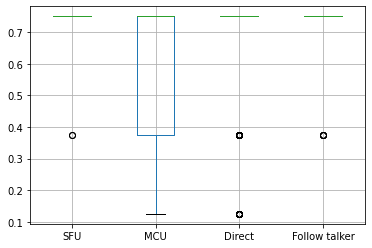

In [ ]:
df_rtp.boxplot()

In [ ]:

dict={
    "SFU": df_sfu["CPU Utilization"].mean(),
    "MCU": df_mcu["CPU Utilization"].mean(),
    "Direct": df_direct["CPU Utilization"].mean(),
    "Follow talker": df_followtalker["CPU Utilization"].mean(),
}

df = pd.DataFrame(pd.Series(dict))
df.head()

,0
SFU,CPU Utilization CPU Speed count ...


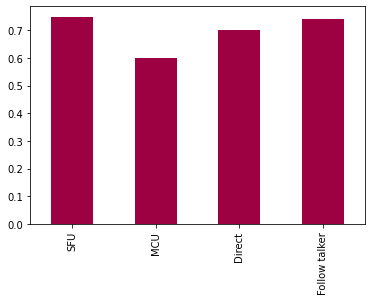

In [ ]:
fig, ax = plt.subplots()
df.plot(kind="bar",colormap='Spectral', #Paired
        legend=False,ax=ax)